<a href="https://colab.research.google.com/github/DineshReddy0530/Grepthor/blob/master/stockmarket%20DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
from datetime import datetime

In [0]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [4]:
import pandas_datareader as pdr
pdr.get_data_yahoo('AAPL')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2020-02-10,321.549988,313.850006,314.179993,321.549988,27337200.0,321.549988
2020-02-11,323.899994,318.709991,323.600006,319.609985,23580800.0,319.609985
2020-02-12,327.220001,321.470001,321.470001,327.200012,28432600.0,327.200012


In [0]:
AAPL=pdr.get_data_yahoo('AAPL',start,end)

In [6]:
AAPL.shape

(251, 6)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,229.283426,225.430797,227.136653,227.595100,2.772595e+07,226.116972
std,44.030261,43.449703,43.670828,43.953923,9.761013e+06,44.512032
min,171.440002,169.490005,169.710007,170.929993,1.136200e+07,168.721588
25%,199.379997,195.250000,196.934998,197.524994,2.091505e+07,195.723831
50%,210.449997,207.199997,208.759995,208.839996,2.604360e+07,206.935638
75%,262.985001,260.539993,261.100006,261.869995,3.201080e+07,261.249969
max,327.850006,323.350006,324.739990,327.200012,6.928140e+07,327.200012


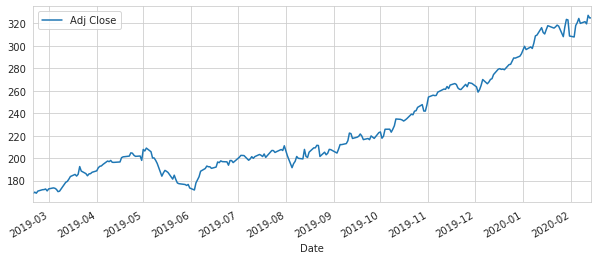

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [9]:
pd.to_datetime(AAPL.index.astype(str))

DatetimeIndex(['2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-03-01', '2019-03-04',
               ...
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

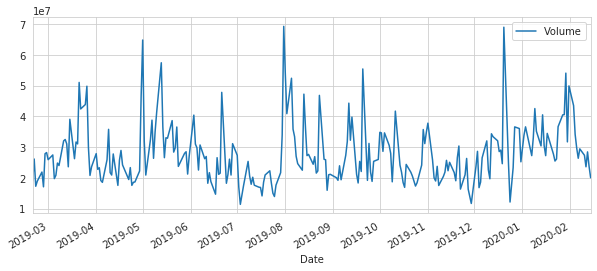

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [0]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-02-19,171.440002,169.490005,169.710007,170.929993,18972800.0,168.721588,NaN,NaN,NaN
2019-02-20,173.320007,170.990005,171.190002,172.029999,26114400.0,169.807388,NaN,NaN,NaN
2019-02-21,172.369995,170.300003,171.800003,171.059998,17249700.0,168.849930,NaN,NaN,NaN
2019-02-22,173.000000,171.380005,171.580002,172.970001,18913200.0,170.735229,NaN,NaN,NaN
2019-02-25,175.869995,173.949997,174.160004,174.229996,21873400.0,171.978958,NaN,NaN,NaN


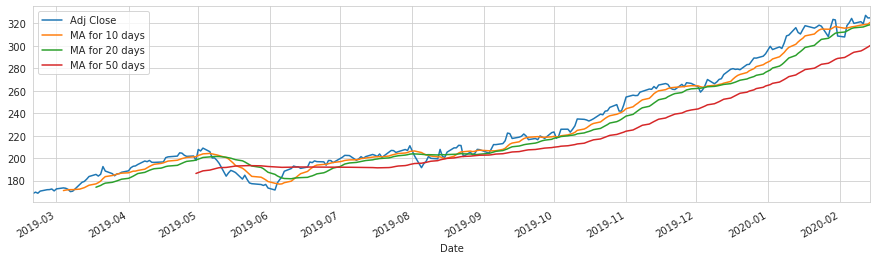

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,4))

In [14]:
AAPL['Adj Close'].pct_change()

Date
2019-02-19         NaN
2019-02-20    0.006435
2019-02-21   -0.005638
2019-02-22    0.011166
2019-02-25    0.007285
                ...   
2020-02-10    0.004750
2020-02-11   -0.006033
2020-02-12    0.023748
2020-02-13   -0.007121
2020-02-14    0.000246
Name: Adj Close, Length: 251, dtype: float64

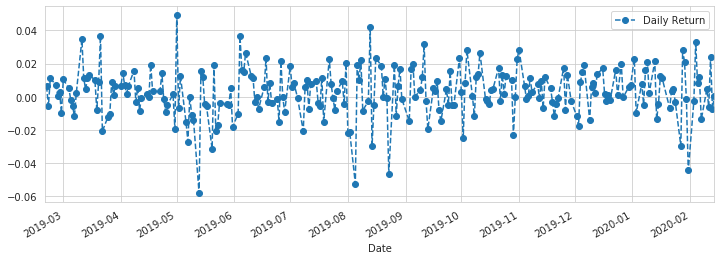

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

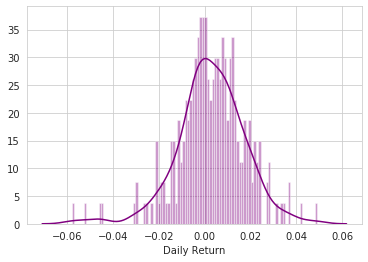

In [39]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

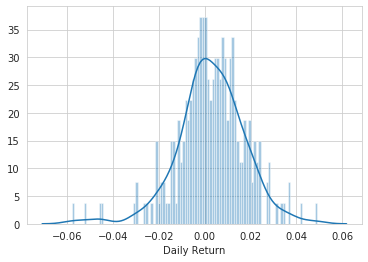

In [20]:
sns.distplot(AAPL['Daily Return'],bins=100)

In [0]:
df=pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']


In [25]:
df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-19,168.721588,1118.560059,106.593895,1627.579956
2019-02-20,169.807388,1113.800049,106.039703,1622.099976
2019-02-21,168.849930,1096.969971,108.276283,1619.439941
2019-02-22,170.735229,1110.369995,109.820114,1631.560059
2019-02-25,171.978958,1109.400024,110.433685,1633.000000


In [0]:
tech_returns = df.pct_change()

In [34]:
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-19,NaN,NaN,NaN,NaN
2019-02-20,0.006435,-0.004255,-0.005199,-0.003367
2019-02-21,-0.005638,-0.015111,0.021092,-0.001640
2019-02-22,0.011166,0.012215,0.014258,0.007484
2019-02-25,0.007285,-0.000874,0.005587,0.000883


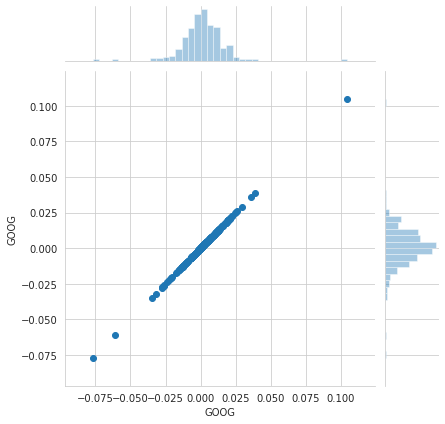

In [27]:
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter')

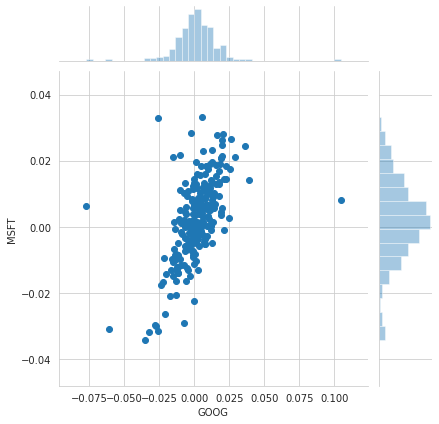

In [30]:
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')

In [36]:
tech_returns[['MSFT','GOOG']].corr()

Symbols,MSFT,GOOG
Symbols,,
MSFT,1.000000,0.565206
GOOG,0.565206,1.000000


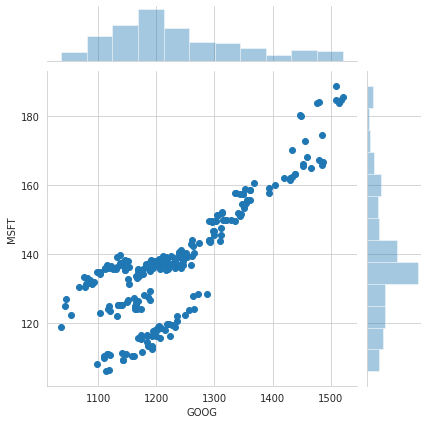

In [35]:
sns.jointplot('GOOG','MSFT',df,kind='scatter')

In [37]:
df[['MSFT','GOOG']].corr()

Symbols,MSFT,GOOG
Symbols,,
MSFT,1.000000,0.837806
GOOG,0.837806,1.000000


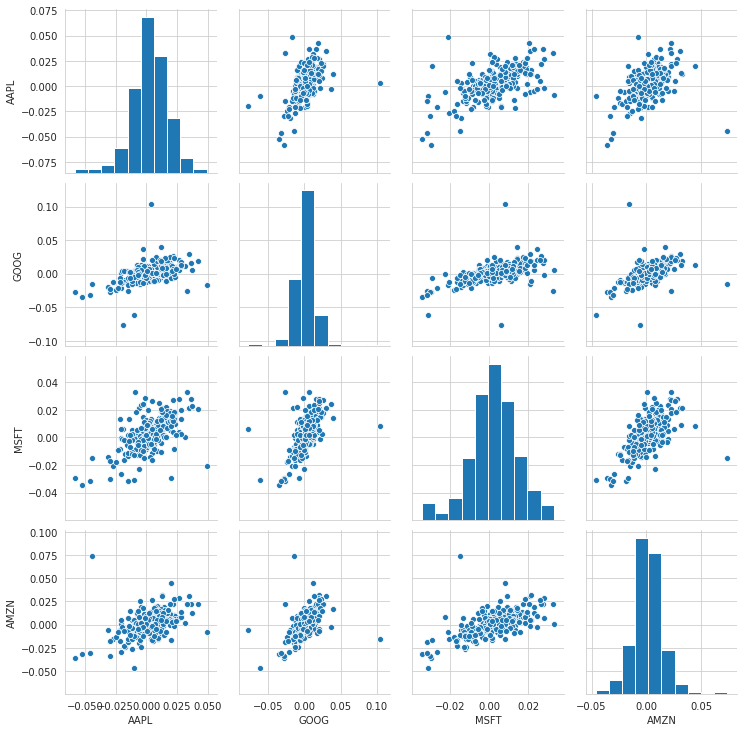

In [41]:
sns.pairplot(tech_returns)

In [43]:
tech_returns.corr(method='pearson')

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.494191,0.572384,0.455181
GOOG,0.494191,1.000000,0.565206,0.478410
MSFT,0.572384,0.565206,1.000000,0.626153
AMZN,0.455181,0.478410,0.626153,1.000000


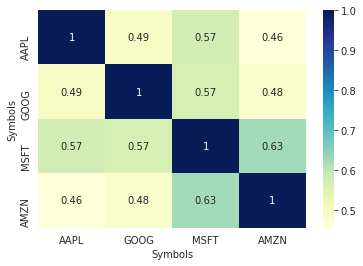

In [51]:
corr=tech_returns.corr()
sns.heatmap(corr,annot=True,cmap ="YlGnBu")

In [0]:
returns=tech_returns.dropna()

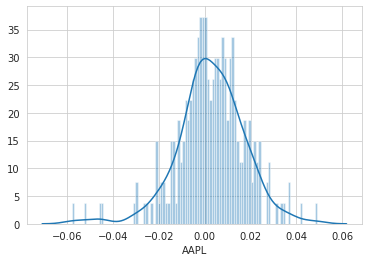

In [63]:
sns.distplot(returns['AAPL'],bins=100)

In [65]:
returns['AAPL'].quantile(0.05)

-0.02066582741846719

The 0.05 empirical quantile of daily returns is at -0.0206. That means that with 95% confidence, our worst daily loss will not exceed 2.06%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0206 * 1,000,000 = $20,600.

In [67]:
print("Worst daily loss for Apple", returns['AAPL'].quantile(0.05))
print("Worst daily loss for Google", returns['GOOG'].quantile(0.05))
print("Worst daily loss for Microsoft", returns['MSFT'].quantile(0.05))
print("Worst daily loss for Amazon", returns['AMZN'].quantile(0.05))

Worst daily loss for Apple -0.02066582741846719
Worst daily loss for Google -0.01882072815761808
Worst daily loss for Microsoft -0.016542569823248122
Worst daily loss for Amazon -0.01761897164523867
